# Opérateurs relationnelles

Les primitives (Opérateurs) relationnelles incluent les transformations du type que nous utilisons dans SQL

Langage de requête structuré (prononcé comme "suite")

** Noms clés **:
    - Base de données "relationnelle"
    - Table
    - Rangée
    - Colonne
    - (Clé primaire)

** Verbes clés **:
    - `CREATE TABLE` /` DROP TABLE` pour modifier la structure de la base de données
    - `SELECT` pour lire quelques lignes
    - `INSERT` /` UPDATE` / `DELETE` pour modifier (ou supprimer) certaines lignes de tableaux

** Modificateurs clés **:
    - `WHERE`: imposer une condition
    - `ORDER BY`: trier
    - `GROUP BY`: agrégat (par exemple, tableaux croisés dynamiques dans Excel)
    - `JOIN`: combinaison de tables en une seule requête
  

## Structures de données et fonctionnalités de Pandas

C'est un bon outil pour l'analyse de petites données - c'est-à-dire lorsque tout rentre dans la mémoire. Le nouveau «nom» de base dans les pandas est la ** trame de données **. 
  
C'est comme une table, avec des lignes et des colonnes (par exemple, comme en SQL). Sauf:
  - Les lignes peuvent être indexées par quelque chose d'intéressant (il existe un support spécial pour les étiquettes comme les données catégorielles et chronologiques). Ceci est particulièrement utile lorsque vous avez des données de séries temporelles avec des points de données potentiellement manquants.
  - Les cellules peuvent stocker des objets Python. (Comme dans SQL, les colonnes sont homogènes.)
  - Au lieu de "NULL", le nom d'une valeur inexistante est "NAN". 
  
Pandas fournit une analyse de données de base :
  - ** Chargement des données: ** `read_csv`,` read_table`, `read_sql` et` read_html`
  - ** Sélection, filtrage et agrégation ** (c'est-à-dire les opérations de type SQL): il existe une syntaxe spéciale pour le `SELECT`. Il existe la méthode `merge` pour` JOIN`. Il existe également une syntaxe simple: créer une nouvelle colonne dont la valeur est calculée à partir d'une autre colonne 
  - ** Regroupement ** `groupby`
  - ** Agrégation de style "tableau croisé dynamique" 
  - ** Gestion NAN 
  - ** Statistiques de base: ** par ex. «mean», «median», «max», «min» et le «describe» pratique.
  - ** Connexion à des analyses plus avancées: 
  - ** Visualisation: ** Par exemple `plot` et` hist`.
 
 
Ci-dessous, nous allons explorer un ensemble de données d'assurance hypothécaire émises par la * Federal Housing Authority (FHA) *. Les données sont ventilées par secteur de recensement et nous indiquent la taille d'un joueur de la FHA dans chaque secteur (combien de foyers, etc.).

In [1]:
d={1,2,3,4}
s={1,6,4}
d.intersection(s)

{1, 4}

In [2]:
d|=d.intersection(s)
d

{1, 2, 3, 4}

In [1]:
import pandas as pd
import os
os.getcwd()

'/home/mbds/wd/TP2 spark'

In [3]:
names =["State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA"]


In [8]:
df = pd.read_csv(os.getcwd()+'/data/fha_by_tract.csv', names=names)  ## Loading a CSV file, without a header (so we have to provide field names)
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
0,8.0,75.0,NaN,1,1,100.0,258,258,100.0
1,28.0,49.0,103.01,1,1,100.0,71,71,100.0
2,40.0,3.0,NaN,1,1,100.0,215,215,100.0
3,39.0,113.0,603.00,3,3,100.0,206,206,100.0
4,12.0,105.0,124.04,2,2,100.0,303,303,100.0


In [12]:
#create a new column as a function of  a group of columns
df['GEOID'] = df['Census_Tract_Number']*100 + 10**6 * df['County_Code'] \
    + 10**9 * df['State_Code']   
    
#sort by value in column    
df = df.sort_values('State_Code')  
df.head()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
23999,1.0,49.0,9613.00,16,4,25.0000,2184,799,36.5842,1.049961e+09
45229,1.0,121.0,109.00,16,2,12.5000,1662,292,17.5692,1.121011e+09
30071,1.0,15.0,15.00,27,9,33.3333,2111,637,30.1753,1.015002e+09
65472,1.0,113.0,NaN,2,0,0.0000,435,0,0.0000,NaN
39229,1.0,103.0,54.04,60,14,23.3333,9263,2051,22.1419,1.103005e+09


In [9]:
df.describe()

,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
count,72034.000000,71984.000000,71040.000000,72035.000000,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,7.104000e+04
mean,28.322528,85.612636,2534.598023,36.970389,9.741667,28.566878,7.886092e+03,1689.278851,29.703179,2.837319e+10
std,16.459507,98.672445,3451.173223,53.975403,15.187832,22.404545,1.302542e+04,2800.346300,24.037779,1.648784e+10
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000,1.001020e+09
25%,13.000000,29.000000,103.020000,13.000000,2.000000,11.111100,1.551000e+03,281.000000,10.780800,1.301596e+10
50%,28.000000,63.000000,442.010000,27.000000,6.000000,25.000000,4.168000e+03,932.000000,24.753900,2.804900e+10
75%,42.000000,109.000000,4503.012500,48.000000,13.000000,41.935500,9.668000e+03,2197.000000,44.207550,4.200348e+10
max,72.000000,840.000000,9922.010000,9477.000000,1932.000000,100.000000,1.575871e+06,331515.000000,100.000000,7.215375e+10


In [10]:
#groupby aggregate
df_by_state = df[['State_Code', 'NUM_ALL']].groupby('State_Code').sum()
df_by_state.head(5)

,NUM_ALL
State_Code,
1.0,35833
2.0,7414
4.0,75730
5.0,25531
6.0,307482


In [11]:
#groupby aggregate
df_by_state = df[['State_Code', 'NUM_FHA']].groupby('State_Code').sum()
df_by_state.head(5)

,NUM_FHA
State_Code,
1.0,9269
2.0,1850
4.0,22533
5.0,5665
6.0,88745


In [13]:
df['NUM_FHA'].head()

23999     4
70052     0
28583    19
51000     2
35321     8
Name: NUM_FHA, dtype: int64

In [14]:
df.NUM_FHA.head()

23999     4
70052     0
28583    19
51000     2
35321     8
Name: NUM_FHA, dtype: int64

<AxesSubplot:>

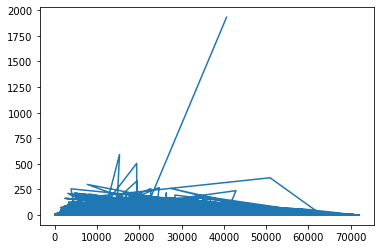

In [15]:
df.NUM_FHA.plot()

# Spark SQL
Spark SQL apporte des dataframes et des fonctionnalités SQL à Spark et, à bien des égards, un peu comme les dataframes de Pandas.

Spark SQL permet d'interroger des données structurées dans les applications Spark. Il prend en charge 2 analyseurs de requêtes: SQL et HiveQL. Nous nous concentrerons sur SQL dans ce qui suit. Spark SQL et les dataframes sont souvent utilisés comme synonymes.

Il apporte également une structure de données DataFrame qui est la meilleure pour l'analyse des données tabulaires.

Malgré toutes les similitudes suggérées, la mise en œuvre des dataframes dans Spark et Pandas est assez différente.

## Spark DataFrames avec Python

Ce bloc-notes présente des exemples d'utilisation de Spark DataFrames en Python.

In [14]:
import pyspark
try:
    sc
except NameError:    
    spark = pyspark.sql.SparkSession.builder.master("local[*]").appName("BD course").getOrCreate()
    sc = spark.sparkContext

répétez l'exemple de FHA comme nous l'avons fait dans Pandas:

In [16]:
delimiter = ","

#csv into spark dataframe   
input_df = spark.read.options(header='true', inferschema='true',delimiter=delimiter)\
                                    .csv("file://"+os.getcwd()+'/data/fha_by_tract.csv')

DataFrame[08: int, 075: int, _c2: double, 13: int, 14: int, 1005: double, 2586: int, 2587: int, 1008: double]

In [17]:

#rename columns
oldColumns = input_df.schema.names
oldColumns


['08', '075', '_c2', '13', '14', '1005', '2586', '2587', '1008']

In [18]:
newColumns = ["State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA"]

In [19]:
for i in range(len(oldColumns)):
    input_df.withColumnRenamed(oldColumns[i],newColumns[i])
input_df.show(3)

# dataframe au spark rdd et dataframe sont immutable

+---+---+------+---+---+-----+----+----+-----+
| 08|075|   _c2| 13| 14| 1005|2586|2587| 1008|
+---+---+------+---+---+-----+----+----+-----+
| 28| 49|103.01|  1|  1|100.0|  71|  71|100.0|
| 40|  3|  null|  1|  1|100.0| 215| 215|100.0|
| 39|113| 603.0|  3|  3|100.0| 206| 206|100.0|
+---+---+------+---+---+-----+----+----+-----+
only showing top 3 rows



# Reduce avec un initialiseur

In [20]:
from functools import reduce
numbers = [1, 2, 3, 4]
reduce(lambda a, b: a + b, numbers,1000) # 3 eme parametre initialiseur

1010

In [21]:
numbers = [1, 2, 3, 4]
s= 1000
for i in range(len(numbers)): 
    s+=numbers[i]
s

1010

In [35]:
fha_df = reduce(lambda input_df, idx: input_df.withColumnRenamed(oldColumns[idx], newColumns[idx]), range(len(oldColumns)), input_df)
fha_df.printSchema()
fha_df.show(3)

root
 |-- State_Code: integer (nullable = true)
 |-- County_Code: integer (nullable = true)
 |-- Census_Tract_Number: double (nullable = true)
 |-- NUM_ALL: integer (nullable = true)
 |-- NUM_FHA: integer (nullable = true)
 |-- PCT_NUM_FHA: double (nullable = true)
 |-- AMT_ALL: integer (nullable = true)
 |-- AMT_FHA: integer (nullable = true)
 |-- PCT_AMT_FHA: double (nullable = true)

+----------+-----------+-------------------+-------+-------+-----------+-------+-------+-----------+
|State_Code|County_Code|Census_Tract_Number|NUM_ALL|NUM_FHA|PCT_NUM_FHA|AMT_ALL|AMT_FHA|PCT_AMT_FHA|
+----------+-----------+-------------------+-------+-------+-----------+-------+-------+-----------+
|        28|         49|             103.01|      1|      1|      100.0|     71|     71|      100.0|
|        40|          3|               null|      1|      1|      100.0|    215|    215|      100.0|
|        39|        113|              603.0|      3|      3|      100.0|    206|    206|      100.0|
+---

## Création de dataframes

Dans l'exemple précédent, nous avons créé un dataframe en chargeant des données à partir d'un fichier CSV.

Dans ce qui suit, nous créons un dataframe à partir d'une liste d'objets `Row`.

In [22]:
from pyspark.sql import *
# Create Example Data - Departments and Employees

# Create the Departments
department1 = Row(id='123456', name='Computer Science')
department2 = Row(id='789012', name='Mechanical Engineering')
department3 = Row(id='345678', name='Theater and Drama')
department4 = Row(id='901234', name='Indoor Recreation')

# Create the Employees
Employee = Row("firstName", "lastName", "email", "salary")
employee1 = Employee('michael', 'armbrust', 'no-reply@berkeley.edu', 100000)
employee2 = Employee('xiangrui', 'meng', 'no-reply@stanford.edu', 120000)
employee3 = Employee('matei', None, 'no-reply@waterloo.edu', 140000)
employee4 = Employee(None, 'wendell', 'no-reply@berkeley.edu', 160000)

# Create the DepartmentWithEmployees instances from Departments and Employees
# structure DAE = structure{ dep , Emp}
departmentWithEmployees1 = Row(department=department1, employees=[employee1, employee2])
departmentWithEmployees2 = Row(department=department2, employees=[employee3, employee4])
departmentWithEmployees3 = Row(department=department3, employees=[employee1, employee4])
departmentWithEmployees4 = Row(department=department4, employees=[employee2, employee3])

print (department1)
print (employee2)
print (departmentWithEmployees1.employees[0].email)



Row(id='123456', name='Computer Science')
Row(firstName='xiangrui', lastName='meng', email='no-reply@stanford.edu', salary=120000)
no-reply@berkeley.edu


Créez le premier DataFrame à partir d'une liste de lignes.

In [26]:
departmentsWithEmployeesSeq1 = [departmentWithEmployees1, departmentWithEmployees2]
df1 = spark.createDataFrame(departmentsWithEmployeesSeq1)
df1.show()
df1.printSchema()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[123456, Computer...|[[michael, armbru...|
|[789012, Mechanic...|[[matei,, no-repl...|
+--------------------+--------------------+

root
 |-- department: struct (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |-- employees: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- firstName: string (nullable = true)
 |    |    |-- lastName: string (nullable = true)
 |    |    |-- email: string (nullable = true)
 |    |    |-- salary: long (nullable = true)



Créez un 2ème DataFrame à partir d'une liste de lignes.

In [30]:
departmentsWithEmployeesSeq2 = [departmentWithEmployees3, departmentWithEmployees4]
df2 = spark.createDataFrame(departmentsWithEmployeesSeq2)
df2.show()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[345678, Theater ...|[[michael, armbru...|
|[901234, Indoor R...|[[xiangrui, meng,...|
+--------------------+--------------------+



### Operations sur DataFrames

Union aux DataFrames.

In [27]:
unionDF = df1.unionAll(df2)
unionDF.show()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[123456, Computer...|[[michael, armbru...|
|[789012, Mechanic...|[[matei,, no-repl...|
|[345678, Theater ...|[[michael, armbru...|
|[901234, Indoor R...|[[xiangrui, meng,...|
+--------------------+--------------------+



Écrivez le DataFrame unifié dans un fichier Parquet 

**Les fichiers Parquet** conservent le schéma avec les données et sont donc utilisés pour traiter un fichier structuré.

In [32]:
def output_cleaner():
    import os
    os.system("rm -rf "+os.getcwd()+"/output*")
    print ("Output folders removed!")

In [33]:
#clean tmp directories if necessary
output_cleaner()

Output folders removed!


In [34]:
fileOutput="file://"+os.getcwd()+"/output_parquet/dfexample_parquet"
unionDF.write.parquet(fileOutput)

Lisez un DataFrame à partir du fichier Parquet

In [35]:
parquetDF = spark.read.parquet(fileOutput)
parquetDF.show()
parquetDF.printSchema()

+--------------------+--------------------+
|          department|           employees|
+--------------------+--------------------+
|[123456, Computer...|[[michael, armbru...|
|[789012, Mechanic...|[[matei,, no-repl...|
|[345678, Theater ...|[[michael, armbru...|
|[901234, Indoor R...|[[xiangrui, meng,...|
+--------------------+--------------------+

root
 |-- department: struct (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-- name: string (nullable = true)
 |-- employees: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- firstName: string (nullable = true)
 |    |    |-- lastName: string (nullable = true)
 |    |    |-- email: string (nullable = true)
 |    |    |-- salary: long (nullable = true)



## Travailler avec des colonnes de type Struct: fonction d'explosion

Lorsque vous travaillez avec des colonnes composites - par exemple, où chaque élément est un type d'objet ou de structure, ou un tableau - nous devons souvent appliquer une transformation à un membre de classe / structure particulier. La fonction Explode aide à y parvenir:
* https://spark.apache.org/docs/latest/api/python/_modules/pyspark/sql/functions.html#explode
* https://sparkbyexamples.com/pyspark/pyspark-explode-array-and-map-columns-to-rows/

In [36]:
from pyspark.sql.functions import explode

df = parquetDF.select(explode("employees").alias("e"))
df.show(3)

+--------------------+
|                   e|
+--------------------+
|[michael, armbrus...|
|[xiangrui, meng, ...|
|[matei,, no-reply...|
+--------------------+
only showing top 3 rows



In [49]:
explodedDF = df.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")
explodedDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
|     null| wendell|no-reply@berkeley...|160000|
|  michael|armbrust|no-reply@berkeley...|100000|
|     null| wendell|no-reply@berkeley...|160000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [50]:
explodedDF.printSchema()

root
 |-- firstName: string (nullable = true)
 |-- lastName: string (nullable = true)
 |-- email: string (nullable = true)
 |-- salary: long (nullable = true)



## Filtrage et tri des dataframes

Nous pouvons maintenant appliquer le filtrage et le tri par un membre de données individuel:

In [51]:
filterDF = explodedDF.filter(explodedDF.firstName == "xiangrui").sort(explodedDF.lastName)
filterDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



Voici comment appliquer un prédicat composite pour le filtrage. De plus, par défaut, le tri est dans l'ordre décroissant, on peut demander à faire par ordre croissant:

In [52]:
from pyspark.sql.functions import col, asc

# Use `|` instead of `or` 
filterDF = explodedDF.filter((col("firstName") == "xiangrui") | (col("firstName") == "michael"))\
                     .sort(asc("lastName"))
filterDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



La clause `where ()` est équivalente à `filter ()`.

In [53]:
whereDF = explodedDF.where((col("firstName") == "xiangrui") | (col("firstName") == "michael"))\
                    .sort(asc("lastName"))
whereDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



## Working with NAs

Replace null values with -- using DataFrame Na functions.

In [54]:
explodedDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
|     null| wendell|no-reply@berkeley...|160000|
|  michael|armbrust|no-reply@berkeley...|100000|
|     null| wendell|no-reply@berkeley...|160000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|    null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [56]:
nonNullDF = explodedDF.fillna("--")
nonNullDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|      --|no-reply@waterloo...|140000|
|       --| wendell|no-reply@berkeley...|160000|
|  michael|armbrust|no-reply@berkeley...|100000|
|       --| wendell|no-reply@berkeley...|160000|
| xiangrui|    meng|no-reply@stanford...|120000|
|    matei|      --|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



Récupérez uniquement les lignes avec firstName ou lastName manquant.

In [57]:
filterNonNullDF = explodedDF.filter(col("firstName").isNull() | col("lastName").isNull())\
                    .sort("email")
filterNonNullDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|     null| wendell|no-reply@berkeley...|160000|
|     null| wendell|no-reply@berkeley...|160000|
|    matei|    null|no-reply@waterloo...|140000|
|    matei|    null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+



In [65]:
filterDNullDF = explodedDF.filter(col("firstName").isNotNull() & col("lastName").isNotNull())\
                    .sort("email")
filterDNullDF.show()

+---------+--------+--------------------+------+
|firstName|lastName|               email|salary|
+---------+--------+--------------------+------+
|  michael|armbrust|no-reply@berkeley...|100000|
|  michael|armbrust|no-reply@berkeley...|100000|
| xiangrui|    meng|no-reply@stanford...|120000|
| xiangrui|    meng|no-reply@stanford...|120000|
+---------+--------+--------------------+------+



## Regroupement et agrégation des données

Exemples d'agrégations utilisant `agg ()` et `countDistinct ()`.

In [66]:
from pyspark.sql.functions import countDistinct

countDistinctDF = explodedDF.select("firstName", "lastName")\
  .groupBy("firstName", "lastName").agg(countDistinct("firstName"))
countDistinctDF.show()

+---------+--------+-------------------------+
|firstName|lastName|count(DISTINCT firstName)|
+---------+--------+-------------------------+
|     null| wendell|                        0|
|    matei|    null|                        1|
| xiangrui|    meng|                        1|
|  michael|armbrust|                        1|
+---------+--------+-------------------------+



Comparez **les plans physiques**  DataFrame et SQL Query (indice: ils doivent être identiques.)
* Dans Spark SQL, le plan physique fournit les informations fondamentales sur l'exécution de la requête. L'objectif de cette présentation est de transmettre la compréhension et la familiarité des plans de requête dans Spark SQL, et d'utiliser ces connaissances pour obtenir de meilleures performances des requêtes Apache Spark.

In [67]:
countDistinctDF.explain()

== Physical Plan ==
*(3) HashAggregate(keys=[firstName#592, lastName#593], functions=[count(distinct firstName#592)])
+- *(3) HashAggregate(keys=[firstName#592, lastName#593], functions=[partial_count(distinct firstName#592)])
   +- *(3) HashAggregate(keys=[firstName#592, lastName#593, firstName#592], functions=[])
      +- Exchange hashpartitioning(firstName#592, lastName#593, firstName#592, 200)
         +- *(2) HashAggregate(keys=[firstName#592, lastName#593, firstName#592], functions=[])
            +- *(2) Project [e#585.firstName AS firstName#592, e#585.lastName AS lastName#593]
               +- Generate explode(employees#570), false, [e#585]
                  +- *(1) FileScan parquet [employees#570] Batched: false, Format: Parquet, Location: InMemoryFileIndex[file:/home/mbds/spark/tpSpark/3_DataFramesSQL/output_parquet/dfexample_parquet], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<employees:array<struct<firstName:string,lastName:string,email:string,salary:bigin

On peut avoir meme resultat en utilisant sql

In [68]:
# register the DataFrame as a temp table so that we can query it using SQL
explodedDF.registerTempTable("df_example")

# Perform the same query as the DataFrame above and return ``explain``
countDistinctDF_sql = spark.sql("SELECT firstName, lastName, count(distinct firstName) as distinct_first_names FROM df_example GROUP BY firstName, lastName")
countDistinctDF_sql.show()

+---------+--------+--------------------+
|firstName|lastName|distinct_first_names|
+---------+--------+--------------------+
|     null| wendell|                   0|
|    matei|    null|                   1|
| xiangrui|    meng|                   1|
|  michael|armbrust|                   1|
+---------+--------+--------------------+



In [69]:
countDistinctDF_sql.explain()

== Physical Plan ==
*(3) HashAggregate(keys=[firstName#592, lastName#593], functions=[count(distinct firstName#592)])
+- *(3) HashAggregate(keys=[firstName#592, lastName#593], functions=[partial_count(distinct firstName#592)])
   +- *(3) HashAggregate(keys=[firstName#592, lastName#593, firstName#592], functions=[])
      +- Exchange hashpartitioning(firstName#592, lastName#593, firstName#592, 200)
         +- *(2) HashAggregate(keys=[firstName#592, lastName#593, firstName#592], functions=[])
            +- *(2) Project [e#585.firstName AS firstName#592, e#585.lastName AS lastName#593]
               +- Generate explode(employees#570), false, [e#585]
                  +- *(1) FileScan parquet [employees#570] Batched: false, Format: Parquet, Location: InMemoryFileIndex[file:/home/mbds/spark/tpSpark/3_DataFramesSQL/output_parquet/dfexample_parquet], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<employees:array<struct<firstName:string,lastName:string,email:string,salary:bigin

Faites la somme de tous les salaires

In [70]:
salarySumDF = explodedDF.agg({"salary" : "sum"}) 
salarySumDF.show()

+-----------+
|sum(salary)|
+-----------+
|    1040000|
+-----------+



In [71]:
sum_sql = spark.sql("SELECT sum(salary)  FROM df_example")
sum_sql.show()

+-----------+
|sum(salary)|
+-----------+
|    1040000|
+-----------+



Imprimez les statistiques récapitulatives des salaires.

In [75]:
explodedDF.describe().show()

+-------+---------+--------+--------------------+------------------+
|summary|firstName|lastName|               email|            salary|
+-------+---------+--------+--------------------+------------------+
|  count|        6|       6|                   8|                 8|
|   mean|     null|    null|                null|          130000.0|
| stddev|     null|    null|                null|23904.572186687874|
|    min|    matei|armbrust|no-reply@berkeley...|            100000|
|    max| xiangrui| wendell|no-reply@waterloo...|            160000|
+-------+---------+--------+--------------------+------------------+



In [76]:
explodedDF.describe("salary").show()

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|                 8|
|   mean|          130000.0|
| stddev|23904.572186687874|
|    min|            100000|
|    max|            160000|
+-------+------------------+



## Un exemple utilisant l'intégration Pandas et Matplotlib

Il existe un connecteur permettant de convertir des dataframes Spark en dataframes pandas. Une fois que vous avez les données dans les dataframes Pandas, plusieurs frontaux de traçage sont disponibles. Y compris Matplotlib:

<AxesSubplot:xlabel='firstName'>

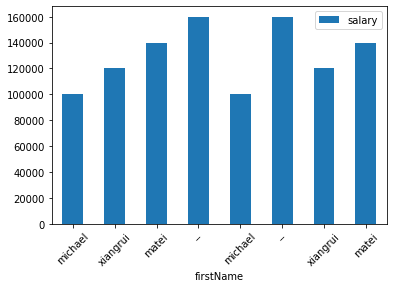

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

pdDF = nonNullDF.toPandas()
pdDF.plot(x='firstName', y='salary', kind='bar',rot=45)
#display()

## Fonctions définies par l'utilisateur en Python

Ce Tp contient quelques exemples de création d'un **UDF** en Python et de son enregistrement pour une utilisation dans Spark SQL.
* https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/


### Étape 1: Enregistrez une fonction comme UDF.

Une fois la fonction standard définie dans Python, vous devez l'enregistrer en tant que UDF pour pouvoir l'utiliser sur Spark DataFrames

In [85]:
def squared(s):
    return s * s

In [86]:
spark.udf.register("squaredWithPython1", squared)

<function __main__.squared(s)>

En option, vous pouvez également définir explicitement le type de retour de votre UDF.

In [87]:
from pyspark.sql.types import LongType


spark.udf.register("squaredWithPython2", squared, LongType())

<function __main__.squared(s)>

### Étape 2: Appelez l'UDF dans Spark SQL

Créez un dataframe pour tester l'UDF nouvellement créé :

In [88]:
spark.range(1, 20).registerTempTable("test_dataframe")

### Étape 3: Utilisez UDF avec DataFrames

In [89]:
df = spark.table("test_dataframe")
df.select("id").show()

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+



In [90]:
from pyspark.sql.functions import udf

squared_udf = udf(squared, LongType())
df = spark.table("test_dataframe")
df.select("id", squared_udf("id").alias("id_squared")).show()

+---+----------+
| id|id_squared|
+---+----------+
|  1|         1|
|  2|         4|
|  3|         9|
|  4|        16|
|  5|        25|
|  6|        36|
|  7|        49|
|  8|        64|
|  9|        81|
| 10|       100|
| 11|       121|
| 12|       144|
| 13|       169|
| 14|       196|
| 15|       225|
| 16|       256|
| 17|       289|
| 18|       324|
| 19|       361|
+---+----------+



Revenons à notre exemple avec les maisons et l'Office fédéral du logement:" homes and Federal Housing Authority"

In [92]:
from pyspark.sql.functions import udf
from math import pow

def geoid(x,y,z):
    if x is not None and y is not None and z is not None:
        return 100*x + pow(10,6)*y + pow(10,9)*z
    else:
        return None

geoid_udf = udf(geoid)

#geoid = lambda x,y,z: x*100 + 10**6*y + 10**9*z
fha_df = fha_df.withColumn("GEOID",geoid_udf("Census_Tract_Number","County_Code","State_Code"))

fha_df.select(col('State_Code'),col('GEOID')).sort('State_Code').show()  

+----------+-------------+
|State_Code|        GEOID|
+----------+-------------+
|      null|         null|
|         1|  1.0872319E9|
|         1|1.025958001E9|
|         1|   1.097005E9|
|         1|1.101005603E9|
|         1|  1.0919732E9|
|         1|1.097001302E9|
|         1|  1.0970049E9|
|         1|  1.0730105E9|
|         1|   1.097004E9|
|         1|1.073005104E9|
|         1|  1.0970027E9|
|         1|1.101005102E9|
|         1|1.097003204E9|
|         1|  1.0330203E9|
|         1|  1.0730035E9|
|         1|  1.1010012E9|
|         1|  1.0279592E9|
|         1|    1.06306E9|
|         1|1.073003803E9|
+----------+-------------+
only showing top 20 rows



In [93]:
#groupby aggregate
fha_df_by_state = fha_df.select('State_Code', 'NUM_ALL').groupBy('State_Code').sum()
fha_df_by_state.show(5)

+----------+---------------+------------+
|State_Code|sum(State_Code)|sum(NUM_ALL)|
+----------+---------------+------------+
|        31|          16554|       18367|
|        53|          76797|       68937|
|        34|          66708|       58948|
|        28|          17892|       16140|
|        26|          64480|       73917|
+----------+---------------+------------+
only showing top 5 rows



In [94]:
#groupby aggregate
fha_df_by_state = fha_df.select('State_Code', 'NUM_FHA').groupBy('State_Code').sum()
fha_df_by_state.show(5)

+----------+---------------+------------+
|State_Code|sum(State_Code)|sum(NUM_FHA)|
+----------+---------------+------------+
|        31|          16554|        4808|
|        53|          76797|       15026|
|        34|          66708|       14056|
|        28|          17892|        3825|
|        26|          64480|       23131|
+----------+---------------+------------+
only showing top 5 rows

